In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random

In [2]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.8/114.8 kB 9.7 MB/s eta 0:00:00
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 14.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.4/243.4 kB 8.9 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 15.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 15.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 12.1 MB/s eta 0:00:0000:0100:01
Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.

In [5]:
import numpy as np

In [3]:
def get_matrix_block(mat, x0, x1, y0, y1):
        matrix_block = []
        for i in range(x0, x1):
            new_row = []
            for j in range(y0, y1):    
                new_row.append(mat[i][j])
            matrix_block.append(new_row)
        return matrix_block

def mergeblocks(upleft, upright, downleft, downright):
    new_mat = []
    for i in range(len(upleft)):
        new_mat.append(upleft[i] + upright[i])
    
    for i in range(len(downleft)):
        new_mat.append(downleft[i] + downright[i])
        
    return new_mat

def pad_matrix(mat):
    original_size = len(mat) 
    next_power_of_2 = 2**np.ceil(np.log2(original_size)).astype(int)
    pad_len = next_power_of_2 - original_size
    pad_np_mat = np.pad(mat, ((0, pad_len), (0, pad_len)), 'constant', constant_values=0)
    pad_mat = pad_np_mat.tolist()
    return pad_mat

def matrix_addition(mat1, mat2):
    new_mat = []
    n = len(mat1)
    for i in range(n):
        new_row = []
        for j in range(n):
            new_row.append(mat1[i][j] + mat2[i][j])
        new_mat.append(new_row)
    return new_mat

def matrix_subtraction(mat1, mat2):
    new_mat = []
    n = len(mat1)
    for i in range(n):
        new_row = []
        for j in range(n):
            new_row.append(mat1[i][j] - mat2[i][j])
        new_mat.append(new_row)
    return new_mat

#############################################################
#                                                           #
# Now onto the actual matrix multiplication implementations #
#                                                           #
#############################################################

def conventional_matmult(mat1, mat2):
    new_mat = []
    m = len(mat1)
    n = len(mat1[0])
    for i in range(n):
        new_row = []
        for j in range(n):
            sum = 0
            for k in range(n):
                sum += mat1[i][k] * mat2[k][j]       
            new_row.append(sum)    
        new_mat.append(new_row)
    return new_mat

def strassen_matmult(mat1, mat2, threshold):
    # Make dimensions a power of 2
    if len(mat1) > 0 and np.log2(len(mat1)) % 1 != 0:
        mat1 = pad_matrix(mat1)
        mat2 = pad_matrix(mat2)
    # Establish an arbitrary base case. To be adjusted
    if (len(mat1) <= threshold):
        mat_prod = conventional_matmult(mat1, mat2)
        return mat_prod
        
    
    # --- Divide the matrices into blocks --- #
    n = len(mat1)
    x = y = (n / 2)
    x = int(x)
    y = int(y)
    
    a = get_matrix_block(mat1, 0, x, 0, y)
    e = get_matrix_block(mat2, 0, x, 0, y) # Upper right blocks
    
    b = get_matrix_block(mat1, 0, x, y, n)
    f = get_matrix_block(mat2, 0, x, y, n) # Upper left blocks
    
    c = get_matrix_block(mat1, x, n, 0, y)
    g = get_matrix_block(mat2, x, n, 0, y) # Lower left blocks
    
    d = get_matrix_block(mat1, x, n, y, n)
    h = get_matrix_block(mat2, x, n, y, n) # Lower right blocks

    
    # --- Calculate multiplication with only 7 variables --- # 
    p1 = strassen_matmult(a, matrix_subtraction(f, h), threshold)
    p2 = strassen_matmult(matrix_addition(a, b), h, threshold)
    p3 = strassen_matmult(matrix_addition(c, d), e, threshold)
    p4 = strassen_matmult(d, matrix_subtraction(g, e), threshold)
    p5 = strassen_matmult(matrix_addition(a, d), matrix_addition(e, h), threshold)
    p6 = strassen_matmult(matrix_subtraction(b, d), matrix_addition(g, h), threshold)
    p7 = strassen_matmult(matrix_subtraction(a, c), matrix_addition(e, f), threshold)

    # --- Calculate the new blocks with these 7 variables --- #
    
    upleft_block = matrix_addition(matrix_subtraction(matrix_addition(p5, p4), p2), p6)
    upright_block = matrix_addition(p1, p2)
    downleft_block = matrix_addition(p3, p4)
    downright_block = matrix_subtraction(matrix_subtraction(matrix_addition(p1, p5), p3), p7)

    
    # Merge the new blocks
    matmult = mergeblocks(upleft_block, upright_block, 
                          downleft_block, downright_block)
    
    return matmult


In [14]:
def testing_threshold():
    dimension = 256
    stras_list = []
    conv_list = []
    for dim in range(2,dimension+1):
        matrix =[[random.randint(0, 20) for _ in range(dim)] for _ in range(dim)]
        #strassens
        stras_avg_runtime = 0
        for _ in range(5):
            start = time.time()
            matmult = strassen_matmult(matrix, matrix, dim-1)
            end = time.time()
            stras_avg_runtime += (end - start)
        stras_avg_runtime /= 5
        stras_list.append(stras_avg_runtime)
        
        #conventional
        conv_avg_runtime = 0
        for _ in range(5):
            start = time.time()
            matmult = conventional_matmult(matrix, matrix)
            end = time.time()
            conv_avg_runtime += (end - start)
        conv_avg_runtime /= 5
        conv_list.append(conv_avg_runtime)
    return stras_list, conv_list
        

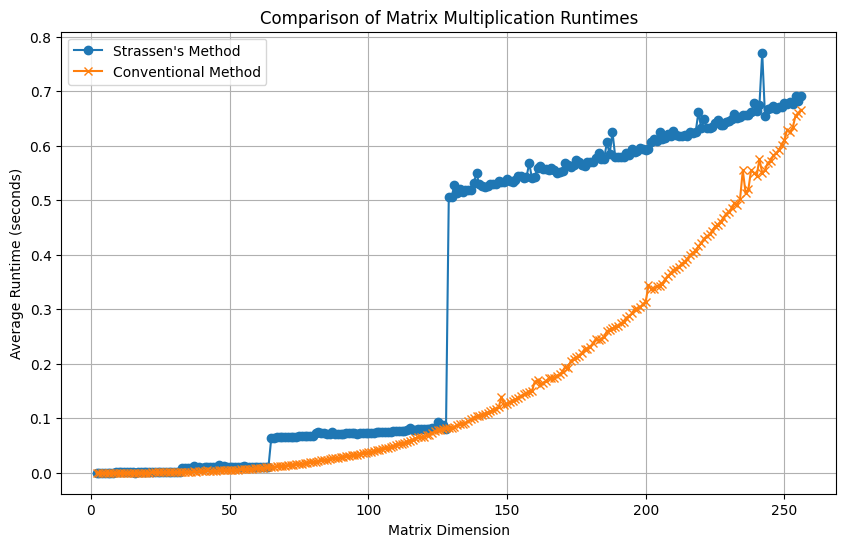

In [16]:
stras_list, conv_list = testing_threshold()
dimension = 256
dimensions = list(range(2, dimension + 1))

plt.figure(figsize=(10, 6))
plt.plot(dimensions, stras_list, label='Strassen\'s Method', marker='o')
plt.plot(dimensions, conv_list, label='Conventional Method', marker='x')

plt.xlabel('Matrix Dimension')
plt.ylabel('Average Runtime (seconds)')
plt.title('Comparison of Matrix Multiplication Runtimes')
plt.legend()
plt.grid(True)
plt.show()
